# Exercise 2: Decision Trees

## In this exercise we will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** 309882298_206172280 ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x18289c80048>, <__main__.Node at 0x1828bdfeac8>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
#############################################################################
# TODO: Find the column\s with missing values and remove them from the data.#
#############################################################################
data = data.dropna()
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Test` sets

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [7]:
y.shape

(8124,)

## Impurity Measures

(5 points each - 10 points total)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation.

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    unique, counts = np.unique(data[:,-1], return_counts=True)
    summed = len(data[:,-1])
    gini = 1 - np.sum(np.power(counts/summed, 2))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    unique, counts = np.unique(data[:,-1], return_counts=True)
    summed = len(data[:,-1])
    entropy = 0 - np.sum((counts/summed)*np.log2(counts/summed))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [10]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

(10 Points)

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch).

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if gain_ratio:
        impurity_func = calc_entropy
    goodnessOfS = impurity_func(data)
    goodness = goodnessOfS
    unique, counts = np.unique(data[:,feature], return_counts=True)
    Svs = dict(zip(unique,counts))
    npFeaturesValueProb = counts/sum(counts)
    for key in Svs.keys():
        Sv = (Svs[key]/len(data[:,-1]))*impurity_func(data[data[:,feature] == key])
        goodness = goodness - Sv
    if  gain_ratio == True:
        if goodnessOfS == 0:
            goodness = 0
        else:
            goodnessOfS = (-1) * np.sum(np.dot((npFeaturesValueProb),np.log2(npFeaturesValueProb)))
            goodness = goodness / goodnessOfS
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

## Building a Decision Tree

(30 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class.

In [12]:
class DecisionNode:

    # This class will hold everything you require to construct a decision tree.
    # The structure of this class is up to you. However, you need to support basic 
    # functionality as described above. It is highly recommended that you 
    # first read and understand the entire exercise before diving into this class.
    
    # DecisionNode initialize method
    def __init__(self, parentFeature = 'ROOT', value = None, parents = {}, negative = 'e', positive ='p'):
        self.parentFeature = parentFeature # column index of criteria being teste
        self.value = value
        self.children = []
        self.pred = None
        self.parents = parents.copy()
        self.currentFeature = 'leaf'
        self.positive = positive
        self.negative = negative
        self.p = 0
        self.e = 0 
        if parentFeature != 'ROOT':
            self.parents[parentFeature] = True

    # adds a given DecisionNode as a child to current DecisionNode
    def add_child(self, node):
        self.children.append(node)

    # adds all the children of the current DecisionNode to the tree
    def add_all_children(self, data, impurity, gain_ratio, max_depth, chi, chi_table):
         # all options of features
        unique, counts = np.unique(data[:,self.currentFeature], return_counts=True)
        for attribute in unique:
            node_data = data[data[:,self.currentFeature] == attribute]
            Node = DecisionNode(self.currentFeature, attribute, self.parents)
            self.add_child(Node)
            if Node.is_pure(node_data):
                continue
            Node.set_prediction(node_data)
            Node.build_Subtree(node_data, impurity, gain_ratio, max_depth - 1, chi, chi_table)

    # setts the best feature to devide the tree by (by using goodness_of_split method) 
    def set_current_feature(self, data, impurity, gain_ratio):
        #data length
        lenF = len(data[0,:-1])
        best_feature = 'leaf'
        best_goodness = 0
        if len(self.parents.keys()) == lenF:
            return
        for feature in range(lenF):
            if feature in self.parents.keys():
                continue
            current_goodness = goodness_of_split(data, feature, impurity, gain_ratio)
            if current_goodness > best_goodness:
                best_feature = feature
                best_goodness = current_goodness
        self.currentFeature = best_feature 

    # builds the subtree of every DecisionNode
    def build_Subtree(self, data, impurity, gain_ratio, max_depth, chi, chi_table=None):
        if max_depth <= 0:
            return
        self.set_current_feature(data, impurity, gain_ratio)
        if chi_table != None and chi < 1 and self.currentFeature != 'leaf':
            self.chi_calc(data, chi, chi_table)
        if self.currentFeature == 'leaf':
            return
        self.add_all_children(data, impurity, gain_ratio, max_depth, chi, chi_table)

    # returns True iff DecisionNode is pure (defines only one type of instances)
    def is_pure(self, data):
        # uniqhe = np.unique(data[:, -1])
        unique, counts = np.unique(data[:,-1], return_counts=True)
        if len(unique) == 1:
            self.pred = unique[0]
            if unique[0] == self.positive:
                self.p = counts[0]
            else:
                self.e = counts[0]
            return True
        else:
            return False

    # setts the prediction type of the DecisionNode by finding most dominant type of instance
    def set_prediction(self, data):
        unique, counts = np.unique(data[:,-1], return_counts=True)
        Svs = dict(zip(unique,counts))
        self.pred = max(Svs, key=Svs.get)
        self.p = Svs[self.positive]
        self.e = Svs[self.negative]
    
    # returns True iff the DecisionNode shouldn't be devided by this feature
    def chi_calc(self, data, chi, chi_table=None):
        sum_pe = self.p + self.e
        p_Y_p = self.p / sum_pe
        p_Y_n = self.e / sum_pe
        attributes, D_f = np.unique(data[:,self.currentFeature], return_counts=True)
        Svs = dict(zip(attributes, D_f))
        Chi_squared = 0
        for attribute in attributes:  
            attribute_data = data[data[:,self.currentFeature] == attribute]
            unique, pn_f = np.unique(attribute_data[:,-1], return_counts=True)
            pn_f_dict = dict(zip(unique, pn_f))
            p_f = 0
            n_f = 0
            if self.positive in pn_f_dict:
                p_f = pn_f_dict[self.positive]
            if self.negative in pn_f_dict:
                n_f = pn_f_dict[self.negative]
            E_p = Svs[attribute] * p_Y_p
            E_n = Svs[attribute] * p_Y_n
            Chi_squared = Chi_squared + ((p_f - E_p)**2)/E_p + ((n_f - E_n)**2)/E_n
        if chi_table[len(attributes)][chi] >= Chi_squared:
            self.currentFeature = 'leaf'    

    # returns the depth of the tree (the longest path between root and leaf)
    def get_max_depth(self):
        max_depth = 0
        for child in self.children:
            child_depth = child.get_max_depth()
            if child_depth > max_depth:
                max_depth = child_depth
        return max_depth + 1
        
    # counts the number of nodes in the tree 
    # Have to add 1 to the $count to count root
    def count_number_of_nodes(self):
        count = 1
        for child in self.children:
           count = count + child.count_number_of_nodes()
        return count

    # returns an output version of the current tree
    def toString(self, number_of_ident = 0):
        return_string = f"{self.format_tree_string()}\n"
        for child in self.children:
            for i in range(number_of_ident):
                return_string = f"{return_string}\t"
            return_string = f"{return_string}{child.toString(number_of_ident + 1)}"
        return return_string

    # returns output version of the current node     
    def format_tree_string(self):
        parent = ""
        child = ""
        if self.parentFeature == 'ROOT':
            parent = parent + "[ROOT, "
        else:
            parent = parent + f"[X{self.parentFeature}={self.value}, "
        if self.currentFeature == 'leaf':
            child = child + "leaf]: [{"
            if self.p > 0:
                child = child + f"1.0:{self.p}"
            if self.p > 0 and self.e > 0:
                child = child + ", "
            if self.e > 0:
                child = child + f"0.0:{self.e}"
            child = child + "}]"
        else:
            child = f'feature=X{self.currentFeature}]'
        return f"{parent}{child}"

In [13]:
def build_tree(data, impurity, gain_ratio=False, chi=1, max_depth=1000, chi_table=None):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    root = DecisionNode()
    if root.is_pure(data) == False:
        root.set_prediction(data)
        root.build_Subtree(data, impurity, gain_ratio, max_depth - 1, chi, chi_table)  
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [14]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

(10 points) 

Complete the functions `predict` and `calc_accuracy`. 

In [15]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if len(node.children) > 0:
        for child in node.children:
            if child.value == instance[node.currentFeature]:
                return predict(child, instance) 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [16]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    sumData = 0
    for instance in dataset:
        if predict(node, instance) == instance[-1]:
            sumData = sumData + 1
    accuracy = sumData / len(dataset) * 100
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [17]:
#### Your code here ####
print(calc_accuracy(tree_gini, X_train))
print(calc_accuracy(tree_gini, X_test))
print(calc_accuracy(tree_entropy, X_train))
print(calc_accuracy(tree_entropy, X_test))
print(calc_accuracy(tree_entropy_gain_ratio, X_train))
print(calc_accuracy(tree_entropy_gain_ratio, X_test))

99.24503528639423
77.5972427375677
99.40915805022156
77.30182176267849
99.63892991957984
78.58197932053176


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

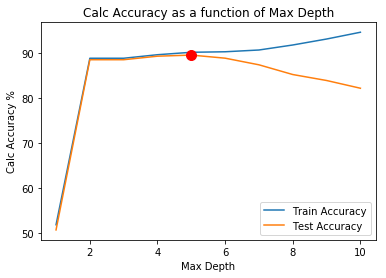

In [18]:
#### Your code here ####
train_accuracy = []
test_accuracy = []
for i in range(1,11):
    i_tree = build_tree(X_train, calc_entropy, True, 1, i)
    train_accuracy.append(calc_accuracy(i_tree,X_train))
    test_accuracy.append(calc_accuracy(i_tree,X_test))
max_Depth_Element = np.amax(test_accuracy)
max_Depth_Key = np.where(test_accuracy == np.amax(test_accuracy))[0][0] + 1
plt.plot(np.arange(1,11), train_accuracy)
plt.plot(np.arange(1,11), test_accuracy)
plt.plot(max_Depth_Key,max_Depth_Element, 'ro', markersize=10)
plt.xscale('linear')
plt.xlabel('Max Depth')
plt.ylabel('Calc Accuracy %')
plt.title('Calc Accuracy as a function of Max Depth')
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

## Chi square pre-pruning

(15 points)

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. <br>
On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle.

In [19]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

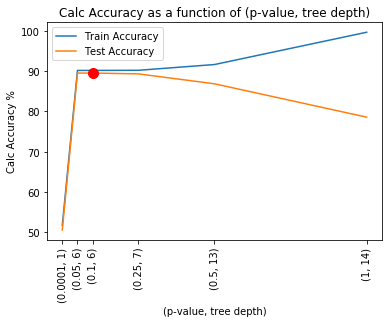

In [20]:
#### Your code here ####
train_accuracy = []
test_accuracy = []
cut_off = [1, 0.5, 0.25, 0.1, 0.05, 0.0001]
tree_depth = []
for chi in cut_off:
    chi_tree = build_tree(X_train, calc_entropy, True, chi, 1000, chi_table)
    tree_depth.append(chi_tree.get_max_depth())
    train_accuracy.append(calc_accuracy(chi_tree,X_train))
    test_accuracy.append(calc_accuracy(chi_tree,X_test))
axis_x = [(cut_off[i], tree_depth[i]) for i in range(0, len(cut_off))]
max_Chi_Element = np.amax(test_accuracy)
max_Chi_Key = cut_off[np.where(test_accuracy == np.amax(test_accuracy))[0][0]]
plt.xticks(cut_off, axis_x)
plt.xticks(rotation=90)
plt.plot(cut_off, train_accuracy)
plt.plot(cut_off, test_accuracy)
plt.plot(max_Chi_Key,max_Chi_Element, 'ro', markersize=10)
plt.xlabel('(p-value, tree depth)')
plt.ylabel('Calc Accuracy %')
plt.title('Calc Accuracy as a function of (p-value, tree depth)')
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [21]:
#### Your code here ####
tree_max_depth = build_tree(X_train, calc_entropy, True, 1, max_Depth_Key)
tree_chi = build_tree(X_train, calc_entropy, True, max_Chi_Key, 1000, chi_table)

## Number of Nodes

(5 points) 

Of the two trees above we will choose the one with fewer nodes.

Complete the function counts_nodes and print the number of nodes in each tree

In [22]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    return node.count_number_of_nodes()

count_depth = count_nodes(tree_max_depth)
count_chi = count_nodes(tree_chi)
print(f"Number of nodes in tree_max_depth is {count_depth}")
print(f"Number of nodes in tree_chi is {count_chi}")
if count_depth < count_chi:
    best_tree_toPrint = tree_max_depth
else:
    best_tree_toPrint = tree_chi
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

Number of nodes in tree_max_depth is 205
Number of nodes in tree_chi is 41


## Print the tree

(5 points)

Complete the function `print_tree` and execute it on your chosen tree. Your code should do print:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
       [X5=a, leaf]: [{1.0: 5}]
       [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

In [23]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''

    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    print(node.toString(1))

print_tree(best_tree_toPrint)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

[ROOT, feature=X4]
	[X4=a, leaf]: [{1.0:31, 0.0:273}]
	[X4=c, leaf]: [{1.0:137, 0.0:10}]
	[X4=f, feature=X10]
		[X10=f, leaf]: [{1.0:91, 0.0:14}]
		[X10=k, leaf]: [{1.0:1037, 0.0:134}]
		[X10=s, leaf]: [{1.0:310, 0.0:22}]
	[X4=l, feature=X1]
		[X1=f, leaf]: [{1.0:1, 0.0:19}]
		[X1=s, leaf]: [{1.0:16, 0.0:94}]
		[X1=y, leaf]: [{1.0:10, 0.0:159}]
	[X4=m, leaf]: [{1.0:25, 0.0:2}]
	[X4=n, feature=X7]
		[X7=b, feature=X18]
			[X18=b, leaf]: [{1.0:2, 0.0:34}]
			[X18=k, leaf]: [{1.0:93, 0.0:843}]
			[X18=n, leaf]: [{1.0:105, 0.0:882}]
			[X18=o, leaf]: [{1.0:4, 0.0:28}]
			[X18=r, leaf]: [{1.0:46, 0.0:6}]
			[X18=w, leaf]: [{1.0:33, 0.0:369}]
			[X18=y, leaf]: [{1.0:3, 0.0:35}]
		[X7=n, feature=X3]
			[X3=f, feature=X10]
				[X10=f, leaf]: [{1.0:3, 0.0:17}]
				[X10=k, leaf]: [{1.0:25}]
				[X10=s, feature=X2]
					[X2=c, leaf]: [{0.0:10}]
					[X2=g, leaf]: [{1.0:1, 0.0:36}]
					[X2=n, leaf]: [{1.0:9, 0.0:37}]
					[X2=r, leaf]: [{1.0:4, 0.0:9}]
					[X2=u, leaf]: [{0.0:14}]
					[X2=w, le